Actividad 3. Series de Fourier

Felipe Ocampo Osorio

Contexto:
Las ondas cuadradas son básicamente ondas que pasan de un estado a otro de tensión, a intervalos regulares, en un tiempo muy reducido. Son utilizadas usualmente para probar amplificadores (esto es debido a que este tipo de señales contienen en sí mismas todas las frecuencias). La televisión, la radio y los ordenadores utilizan mucho este tipo de señales, fundamentalmente como relojes y temporizadores. Un ejemplo de onda cuadrada es la onda de corriente continua (DC), la cual alterna su valor entre dos intervalos extremos sin pasar por los valores intermedios (caso contrario de lo que sucede con la onda senoidal y la onda triangular). La onda cuadrada se usa principalmente para la generación de pulsos eléctricos que son usados como señales (1 y 0). Un circuito electrónico que genera ondas cuadradas se conoce como generador de pulsos, este tipo de circuitos es la base de la electrónica digital y su manipulación no requiere de conocimientos avanzados.

Elaboración

In [39]:
import numpy as np
import matplotlib.pylab as plt
from scipy import signal as sp
# Importamos todo el modulo sympy
from sympy import *
# Importamos las variables simbolicas 'n' y 't',
from sympy.abc import n,t

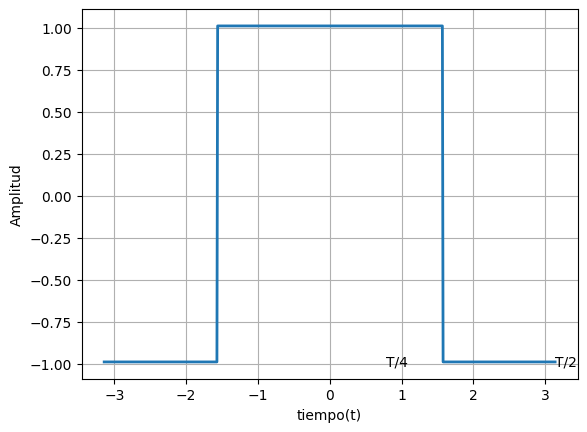

In [62]:
T = 2*pi #Periodo
w = (2*pi)/T #Frecuencia angular
amplitud = 1 #Amplitud
tiempo = np.arange(-np.pi, np.pi, 0.01) #Tiempo
FuncionTramos = (sp.square(tiempo + 1.57 )*amplitud) + amplitud/100 #Onda cuadrara

# Graficamos la onda cuadrada
plt.plot(tiempo, FuncionTramos, lw=2)
plt.grid()
plt.annotate('T/2', xy = (np.pi, -1), xytext = (np.pi, -1.01))
plt.annotate('T/4', xy = (np.pi /4, -1), xytext = (np.pi /4, -1.01))
plt.ylabel('Amplitud')
plt.xlabel('tiempo(t)')
plt.show()

Calculamos los coeficientes usando sympy

In [63]:
# Integración de la función
#Limites de integración dados en el ejercicio
ao = (2/T)*(integrate(-1, (t, -T/2, -T/4)) + integrate(1, (t, -T/4, T/4)) + integrate(-1, (t, T/4, T/2)))
print("a0 = ")
pprint(ao)
print('\n')

# Integramos la funcion (2/pi)*sin(2nt)
an = (2/T)*(integrate(-cos(n*w*t), (t, -T/2, -T/4)) + integrate(cos(n*w*t), (t, -T/4, T/4)) + integrate(-cos(n*w*t), (t, T/4, T/2)))

print("an = ")
pprint(an)

# Integramos la funcion (2/pi)*cos(2nt) 
bn = (2/T)*(integrate(-sin(n*w*t), (t, -T/2, -T/4)) + integrate(sin(n*w*t), (t, -T/4, T/4)) + integrate(-sin(n*w*t), (t, T/4, T/2)))

print("bn = ")
pprint(bn)

a0 = 
0


an = 
                                              ⎛⎧   ⎛π⋅n⎞                      
⎛⎧     ⎛π⋅n⎞                            ⎞     ⎜⎪sin⎜───⎟                      
⎜⎪2⋅sin⎜───⎟                            ⎟     ⎜⎪   ⎝ 2 ⎠   sin(π⋅n)           
⎜⎪     ⎝ 2 ⎠                            ⎟     ⎜⎪──────── - ────────  for n > -
⎜⎨──────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0⎟ + 2⋅⎜⎨   n          n               
⎜⎪    n                                 ⎟     ⎜⎪                              
⎜⎪                                      ⎟     ⎜⎪        -π                    
⎝⎩    π               otherwise         ⎠     ⎜⎪        ───                  o
                                              ⎝⎩         2                    
──────────────────────────────────────────────────────────────────────────────
                                               π                              

                 ⎞
                 ⎟
                 ⎟
∞ ∧ n < ∞ ∧ n ≠ 0⎟
                 ⎟
                 ⎟


Se calcula la serie basada en la cantidad de coeficientes

In [70]:
print( "f(x) = ")

ncoef = 16 #16 coeficientes para obtener 8 series
serie = (ao)/2
for i in range(1, ncoef + 1):
    serie = serie + (an*cos(n*w*t)).subs(n, i)
for j in range(1, ncoef + 1):
    serie = serie + (bn*sin(n*w*t)).subs(n, j)

pprint(serie)
#Como se puede observar los términos de la serie 2, 4, 6 y 8 se vuelven 0

f(x) = 
4⋅cos(t)   4⋅cos(3⋅t)   4⋅cos(5⋅t)   4⋅cos(7⋅t)   4⋅cos(9⋅t)   4⋅cos(11⋅t)   4
──────── - ────────── + ────────── - ────────── + ────────── - ─────────── + ─
   π          3⋅π          5⋅π          7⋅π          9⋅π           11⋅π       

⋅cos(13⋅t)   4⋅cos(15⋅t)
────────── - ───────────
   13⋅π          15⋅π   


Se grafica cada serie de forma individual 

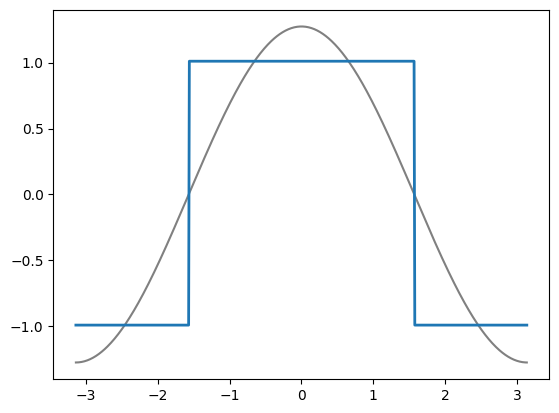

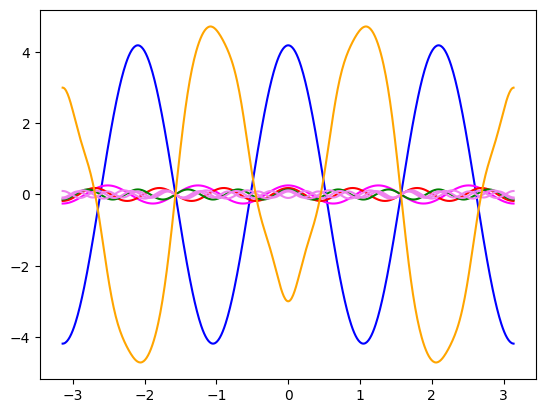

In [76]:
serie1 = (4 * np.cos(tiempo)) / np.pi
plt.plot(tiempo, serie1, 'grey', label = '(4 *cos(tiempo)) /pi)')
plt.plot(tiempo, FuncionTramos, lw=2)
plt.show()

serie2 = ((4 * np.cos(tiempo*3)) / 3*np.pi)
plt.plot(tiempo, serie2, 'blue', label = '(4 *cos(3*tiempo)) / 3*pi)')

serie3 = (4 * np.cos(5*tiempo)) / (5*np.pi)
plt.plot(tiempo, serie3, 'magenta', label = '(4 *cos(5*tiempo)) / (5*pi)')

serie4 = (4* np.cos(7*tiempo)) / (7*np.pi)
plt.plot(tiempo, serie4, 'red', label = '(4*cos(7*tiempo)) / (7*pi)')

serie5= (4 * np.cos(9*tiempo)) / (9*np.pi)
plt.plot(tiempo, serie5, 'green', label = '(4 *cos(9*tiempo)) / (9*pi)')

serie6 = (4 * np.cos(11*tiempo)) / (11*np.pi)
plt.plot(tiempo, serie6, 'violet', label = '(4 *cos(11*tiempo)) / (11*pi)')

serie7 = (-4 * np.cos(13*tiempo)) / (13*np.pi)
plt.plot(tiempo, serie7, 'violet', label = '(4 *cos(13*tiempo)) / (13*pi)')

serie8 = (4 * np.cos(15*tiempo)) / (15*np.pi)
plt.plot(tiempo, serie8, 'violet', label = '(4 *cos(15*tiempo)) / (15*pi)')


serieFourier = serie1 - serie2 + serie3 - serie4 + serie5 - serie6 + serie7 - serie8
plt.plot(tiempo, serieFourier, 'orange')
plt.show()

Grafica de serie de Fourier

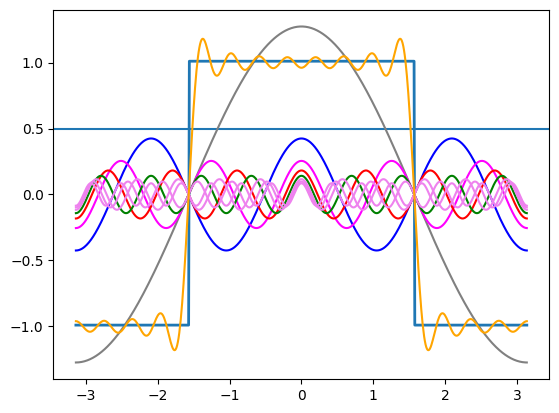

In [77]:
plt.axhline(y = 0.5, label = '1/2')

serie1 = (4 * np.cos(tiempo)) / np.pi
plt.plot(tiempo, serie1, 'grey', label = '(4 *cos(tiempo)) /pi)')
plt.plot(tiempo, FuncionTramos, lw=2)


serie2 = (4 * np.cos(tiempo*3)) / (3*np.pi)
plt.plot(tiempo, serie2, 'blue', label = '(4 *cos(tiempo*3)) / 3*pi)')

serie3 = (4 * np.cos(5*tiempo)) / (5*np.pi)
plt.plot(tiempo, serie3, 'magenta', label = '(4 *cos(5*tiempo)) / (5*pi)')

serie4 = (4* np.cos(7*tiempo)) / (7*np.pi)
plt.plot(tiempo, serie4, 'red', label = '(4*cos(7*tiempo)) / (7*pi)')

serie5= (4 * np.cos(9*tiempo)) / (9*np.pi)
plt.plot(tiempo, serie5, 'green', label = '(4 *cos(9*tiempo)) / (9*pi)')

serie6 = (4 * np.cos(11*tiempo)) / (11*np.pi)
plt.plot(tiempo, serie6, 'violet', label = '(4 *cos(11*tiempo)) / (11*pi)')

serie7 = (4 * np.cos(13*tiempo)) / (13*np.pi)
plt.plot(tiempo, serie7, 'violet', label = '(4 *cos(13*tiempo)) / (13*pi)')

serie8 = (4 * np.cos(15*tiempo)) / (15*np.pi)
plt.plot(tiempo, serie8, 'violet', label = '(4 *cos(15*tiempo)) / (15*pi)')


serieFourier = serie1 - serie2 + serie3 - serie4 + serie5 - serie6 + serie7 - serie8

plt.plot(tiempo, serieFourier, 'orange')

Graficamos la serie de fourier y la función de onda cuadrada

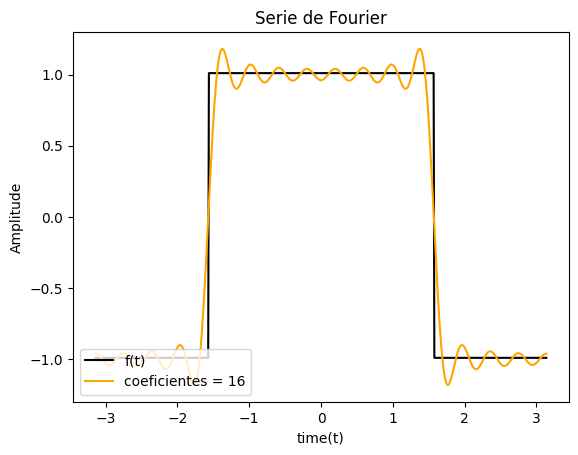

In [75]:
plt.plot(tiempo, FuncionTramos, 'black', label = 'f(t)')
etiqueta = 'coeficientes = '+ str(ncoef )
serieFourier = serie1 - serie2 + serie3 - serie4 + serie5 - serie6 + serie7 - serie8
plt.plot(tiempo, serieFourier, 'orange', label = etiqueta)
plt.title('Serie de Fourier')
plt.xlabel('time(t)')
plt.ylabel('Amplitude')
plt.legend(loc = "lower left")